# K-Means

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

## Toy Example 直接走一次

### 產生資料

* 我們用內建的 function，來產出一筆模擬資料

In [116]:
# from sklearn.datasets.samples_generator import make_blobs # 舊版寫法，已不能使用
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

In [117]:
# 看資料的維度
print(X.shape)
# 看資料的前五筆
print(X[:5]) 

(300, 2)
[[ 0.83685684  2.13635938]
 [-1.4136581   7.40962324]
 [ 1.15521298  5.09961887]
 [-1.01861632  7.81491465]
 [ 1.27135141  1.89254207]]


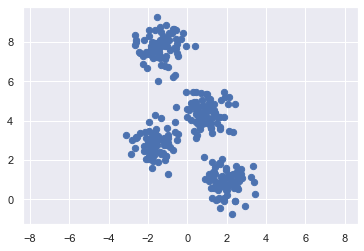

In [118]:
ax = plt.gca()
ax.axis('equal')
ax.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis', zorder=2);

* 從上面的資料和圖，可以得知我們拿到一組 nxp = 300x2 的資料  
* 在座標系上描出這 300 個點，長得像上圖一樣。
* 直觀來看，分成四群。由於這是模擬資料，所以其實我知道他真的是來自 4 群，而且我還有他們的真實標籤 (`y_true`)

### 概念講解

### code 實作

#### training

In [119]:
# 必要參數，我想分成幾群
num_clusters = 4

# training
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = num_clusters);
kmeans.fit(X);

* 有幾個我們想知道的內容：  
  * 最後得到的那些 centers，座標分別是多少？ -> 用 `kmeans.cluster_centers_` 來查看. 
  * 最後分完全群後，`inertia` (i.e. Total within sum of square) 是多少 -> 用 `kmeans.inertia_` 來查看

In [120]:
# centers 的座標
kmeans.cluster_centers_

array([[ 1.98258281,  0.86771314],
       [-1.37324398,  7.75368871],
       [-1.58438467,  2.83081263],
       [ 0.94973532,  4.41906906]])

#### 預測 目前/未來 的 instance 屬於哪一群

In [121]:
# prediction
y_kmeans = kmeans.predict(X)

* 可以看到分群結果：

In [122]:
y_kmeans

array([0, 1, 3, 1, 0, 0, 2, 3, 1, 1, 2, 1, 3, 1, 0, 3, 3, 0, 2, 2, 0, 0,
       3, 2, 2, 3, 0, 3, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 0, 3, 2, 3, 3,
       2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 3, 1, 2, 2, 2,
       1, 0, 1, 2, 3, 2, 1, 2, 2, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 0, 3,
       1, 1, 3, 0, 1, 2, 2, 3, 0, 0, 3, 2, 1, 0, 1, 0, 3, 0, 0, 3, 1, 3,
       2, 2, 0, 1, 0, 3, 1, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       2, 0, 1, 2, 2, 1, 3, 1, 1, 2, 3, 2, 3, 2, 1, 3, 1, 1, 1, 3, 1, 3,
       0, 2, 1, 2, 0, 3, 1, 3, 3, 0, 3, 2, 2, 3, 0, 3, 3, 1, 0, 3, 2, 1,
       0, 0, 3, 2, 0, 3, 2, 2, 3, 3, 3, 3, 0, 1, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 1, 3, 2, 0, 2, 3, 1, 2, 1, 3, 1, 3, 2, 3, 3, 1, 2, 2, 0, 0, 3,
       1, 0, 0, 2, 0, 2, 3, 1, 1, 3, 3, 1, 3, 0, 2, 3, 0, 2, 1, 2, 0, 3,
       0, 1, 1, 1, 1, 2, 2, 1, 3, 2, 0, 3, 2, 2, 2, 0, 0, 1, 3, 3, 2, 0,
       1, 2, 3, 1, 3, 0, 0, 2, 2, 3, 0, 0, 0, 3, 1, 1, 0, 0, 3, 0, 0, 0,
       1, 2, 1, 3, 0, 0, 1, 1, 1, 0, 0, 3, 1, 2], d

#### 視覺化

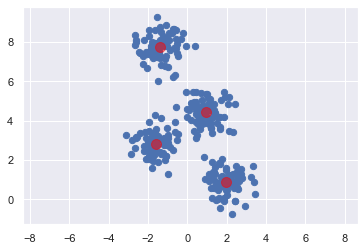

In [129]:
ax = plt.gca()
ax.axis('equal')
ax.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis');

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);

## 細節討論

### 與 效果 有關的討論

#### 分群結果到底好不好？

* 看圖： 
  * 直接畫圖來看，是一定要先做的事 (二維就直接畫圖，多維就先降維再畫圖)
  * 以此例來說，很明顯分的不錯，看起來是 4 群，實際也分成 4 群
* 看量化指標：  
  * 我們可以把 centers 當成是那一群的預測值，然後去算 total square error，就可以知道預測的好不好. 
  * 那這個total square error，其時就是 within group variance. 
  * 而在 kmeans 中，被稱為 `inertia`，我們可以這樣得到結果：

In [57]:
print("inertia(i.e. total square error; within group sum of square): ", kmeans.inertia_)
print("RMSE(i.e. sqrt(inertia/n_points): ", np.sqrt(kmeans.inertia_/X.shape[0]))

inertia(i.e. total square error; within group sum of square):  212.00599621083478
RMSE(i.e. sqrt(inertia/n_points):  0.8406465690384491


* 如果，我們對 domain knowledge 是有 fu 的，那就可以用 mean square error 的角度去解釋這樣算大算小： 平均來說，分完群後，大家離各群的中心有 RMSE 這麼遠

#### 如果分的不好怎麼辦？  

* 有時候分群完一看圖，就覺得分得有點 NG，例如：  

* <span style="color: red"> 那接下來可以做的包括 </span>：  
  * 不是線性可分的資料，改成用非線性的方法(例如 kernel 版 KMeans; 或是本來就是 nonlinear 的分群演算法，如：...)
  * 可能是預設群數設定不佳的問題，可以用xxx來決定群數. 

### 與 EDA 有關的討論

#### 使用 KMeans 有 assumption 嗎？

* KMeans 雖然看起來很簡單好算，又沒有特別假設資料要符合什麼分佈，但其實，他是有假設的，只是沒說而已  
* 延續剛剛的例子，我們把每一群的 center 標出來，然後拿該群離 center 最遠的點和 center 的距離當半徑，可以畫出下圖：

In [138]:
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis', alpha = 0.5, zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.8, zorder=1))

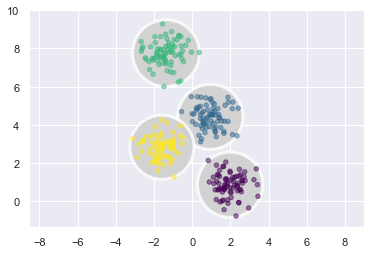

In [139]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

* 從圖中可以看到，在圓內的點，就會被分為該群。  
* 以中間那兩群來說，中間的黃色點，他介於兩群中間，但因為他和黃色的中心，比和藍色的中心近，所以他被歸為黃色那群。那意思就是，在這圈圈內的，都被歸為黃色的群。  
* 所以，把這個圓當 contour 來看，就會是個二元常態，且變異數共變數矩陣必須是對角矩陣，且對角線上的每個 element 都一樣大 (i.e. $\Sigma = c*I$，c 是常數。因為 contour 是正圓，不是斜橢圓，表變異數相等)。
* 所以，KMeans 的假設，可以寫成：  
  * $(X_i | S_i = k) \sim N(\mu_k, \Sigma_k)$: 第 i 筆資料，given 他是第 k 群的話($S_i = k$)，那他會 follow 一個 multivariate normal distribution. 
  * 而且， $\Sigma_k = \lambda_k * I, k = 1,2,...,K$: 意思是，變異數共變數矩陣，不僅是對角矩陣，而且對角線的 element 每個都一樣大  
  * $X_i$ 就是來自 mixture of k 個 Multivariate Normal
* 由此可知，之後會介紹的 Gaussian Mixture Model (GMM)，可以視為 KMeans 的推廣。而 KMeans 只是 GMM 的特例。  
* <span style = "color: red">可以先睹為快</span>： 
  * 如果資料不是分佈的像正圓，而是橢圓的樣子，那 KMeans 會分不好，但 GMM 會分的好  
  * 如果資料分布的就是正圓的樣子，那 GMM 會分的根 KMeans 一樣好

#### Imbalance 的群數可以處理嗎？

* 如果今天有 100 筆資料，而且我們手中握有真實的標籤(2類)，1類有 90 筆，另一類 10 筆，那 KMeans 有辦法幫我分成兩群嗎？

#### 要分成幾群？

* 先畫圖來點直覺. 
  * 例如剛剛的範例，一畫完圖，就知道分成 4 群是好選擇. 
  * 如果今天資料的 feature 大於 2 維，無法直接畫圖，那就先做降維，用 2 維的圖來判斷一下要分成幾群. 
* 畫完圖還看不出來，可以進一步用：  
  * inertia + elbow method  
    * 用迴圈，分成 k 群， k = 1,2,...,K. 
    * 每做一次，就算 inertia，然後看 inertia 在哪裡有拐點. 
  * 輪廓圖：

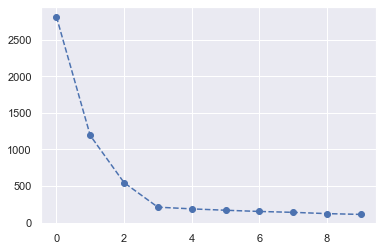

In [65]:
inertia_list = []
for k in range(10):
    try_kmeans = KMeans(n_clusters= k+1)
    try_kmeans.fit(X)
    inertia_list.append(try_kmeans.inertia_)
plt.plot(inertia_list, '--bo');

* 可以看到，在第 4 個 點的時候，出現 elbow，所以適合用 k = 4 來當群數

* <span style="color: red"> 如果用了畫圖，和 elbow method，都還是很難決定群數，那可以考慮：  </span>
  * 用別的指標(e.g. AIC)來取代inertia： 例如改用 Gausian Mixture Model 來分群，他提供的 AIC 指標也許可以更好的選到 k 要幾群. 
  * 用可以直接幫你找出群數的分群方法：  
    * Baysian 版的 GMM  
    * DBSCAN. 
    * mean-shift. 
    * affinity propagation

#### Outlier 會影響到 KMeans 嗎？

#### 對於非數值形的 feature 如何處理？

#### <span style="color: red">使用 KMeans 前要做前處理嗎？</span>

* 先講結論：  
  * require: Normalization. 
  * optional: PCA
* 由於 KMeans 在算兩點的距離時，就直接把所有 feature 一視同仁的算 Euclidean Distance，所以把大家的單位都調成一樣，是很重要的  
* 如果對每個 feature 做 Normalization，那就等於把變異數共變數矩陣的對角項所有元素設為1(等變異)。此時的 contour 仍不一定是正圓，而是 x, y 方向的 range 一樣大的斜橢圓. 
* 但如果想做到確保 contour 是正圓，那就接著做 PCA (就 de-correlation了)

### 與建模有關的討論

#### 起始值有影響嗎？

* KMeans 在做起始值時，是用隨機撒點的方式(從現有資料中，隨機抽出 k 筆資料當中心). 
* 所以，如果你起始值撒得不好  
* 例如，我們已經知道一組爛起始值如下：

In [48]:
# 已知的爛起始值
rng = np.random.RandomState(0)
i = rng.permutation(X.shape[0])[:num_clusters]
print("起始值是取資料的這 4 個 row: ", i)
print("起始 centers 的座標如下：")
print(X[i])

起始值是取資料的這 4 個 row:  [208 188  12 221]
起始 centers 的座標如下：
[[1.07627418 4.68480619]
 [2.47019077 1.31451315]
 [1.24258802 4.50399192]
 [2.5270643  0.6178122 ]]


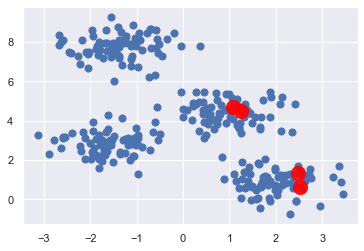

In [52]:
plt.scatter(
    x = X[:, 0], 
    y = X[:, 1], 
    s = 50, 
    cmap='viridis'
)

plt.scatter(X[i][:, 0], X[i][:, 1], c='red', s=200, alpha=0.9);

* 所以，如果一開始起始值取到這組，那結果會很慘：

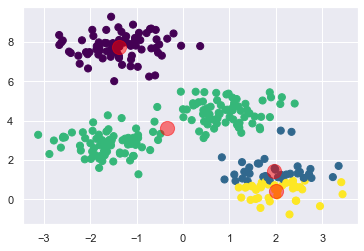

In [67]:
kmeans_bad = KMeans(
    n_init = 1, # 預設是 10
    n_clusters = num_clusters,
    init = X[i] # 給定剛剛那組起始值
)
kmeans_bad.fit(X)
y_pred_bad = kmeans_bad.predict(X)

plt.scatter(
    x = X[:, 0], 
    y = X[:, 1], 
    c = y_pred_bad, 
    s = 50, 
    cmap='viridis'
)

centers_bad = kmeans_bad.cluster_centers_
plt.scatter(centers_bad[:, 0], centers_bad[:, 1], c='red', s=200, alpha=0.5);

* 可以看到，分群結果不理想. 
* 那這部分在實作時，是可以不用太擔心  
* 因為 sklearn 知道 KMeans 有這個缺陷，所以他會. 
  * 預設就先幫你撒 10 組 init (可從 `n_init = 10` 這個參數來做設定). 
  * 每一組 init，就會做一次完整的 KMeans 分群，分完後，得到 inertia. 
  * 只取出 10 組中， inertia 最小的給你，當作結果
* <span style="color: red">選初始值的其他方式: 另一本書的 p237 開始</span>

#### 善用 `?` 可得 function 滿滿細節

In [71]:
?KMeans

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='auto',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an array is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passed, it should ta

#### 如何將 KMeans 變成 nonlinear？

* KMeans 的算法，是算 點 到 center 的距離，所以概念上，他用 "圓形" 的 decision boundary 在分群，只能做到 線性 分群
* 那如果碰到以下經典的 `moon` dataset，用 KMeans 就分不好：

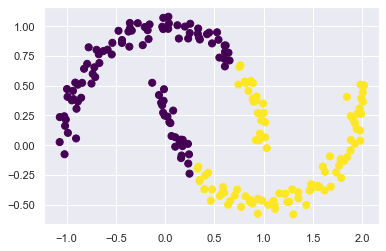

In [72]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

* 可以看到， Kmeans 把他切成左邊和右邊，但...應該要分成上半圓和下半圓  
* 如果想改善的話，有兩條路可以走：  
  * 把資料先投影到高維度，再用 KMeans 對高維資料做分群 (所以，概念上就是 kernel methods, e.g. SVM). 
  * 換方法吧...，xxx方法 可以做到 nonlinear 分群  
* 這邊來試試 kernel 的方法：

/Volumes/GoogleDrive/我的雲端硬碟/0. codepool_python/python_ds/python_ds_env/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


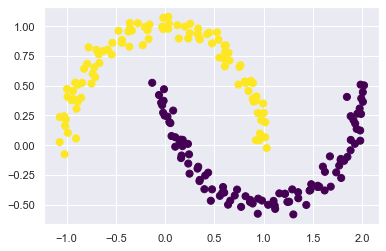

In [73]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(
    n_clusters=2, 
    affinity='nearest_neighbors',
    assign_labels='kmeans'
)

labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

#### KMeans 可以處理 big data 嗎？

* KMeans 在每次 iteration 的時候，都要算組平均. 
* 這意味著，他要一直對 "所有" 的 data 算 mean_vector. 
* 那資料量一多，就會算很慢. 
* 所以解決方法是：  
  * 使用 `batch-based k-means`  
  * 也就是每次迭代時，我只用一個 batch 的資料來更新 mean_vector 就好. 
  * 這邊的做法，可用 `sklearn.cluster.MiniBatchKMeans` 來處理，等等可在<span style="color: red">哪裡看到這個例子</span>

### 與後續應用有關的討論

#### KMeans 可以用在訊號分群嗎？

* <span style="color: red"> 可以 der，舉股票走勢 的例子. </span>

#### KMeans 可以用在影像分群嗎？  

* <span style="color: red">可以 der，舉 number digit 分群的例子 </span>

## 推薦的 workflow

* EDA:  
* 建模:

## Real world examples

### [訊號分群] Stock Movent

* 這個應用蠻好玩的，我們可以對股票的 "走勢" 做分群。
* 資料如以下： 

In [94]:
movements = pd.read_csv("data/company-stock-movements.csv", index_col = 0)
movements.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


* 可以看到，每一列是一家公司，每一行是時間點，值是股價(大概做過一些調整了，所以有正有負，我們可以不用管他，就當是股價即可)  
* 我們就取這前 5 家公司，來看看他的走勢圖：

* 如果我今天要做的分群，是對絕對的數值做分群，那我就直接用這張表分群就好. 
* 因為，我去算兩列的 歐式距離，就等於在算兩條訊號的距離有多近。所以，比較近的就被分在同一群裡. 
* 但如果我今天是想對 "走勢" 做分群，那我會希望對 "列" 做標準化。
  * 舉例來說，台積電的股價變化是 600, 580, 600, 620, 640，啟基是 60, 58, 60, 62, 64。
  * 那從 "走勢" 來看，台積跟啟基走勢是一樣的，應該被分為一群，但如果直接做 kmeans，就再見了，因為光 600 和 60 的距離就很遠。  
  * 另外，台積股價的變化是 -20, 20, 20, 20; 啟基是 -2, 2, 2, 2，這個變動差距也不同，但如果改成看變化百分比(把股價放分母，變化當分子)，那兩邊就又差不多了. 
  * 所以，我如果先對列做標準化，那兩個公司的數值就都變成 [-0.39, -1.37, -0.39, 0.58, 1.56]，一模模一樣樣，euclidean distance 變成 0，分群時一定放在一塊兒
* 所以，這一個例子，我們就要對 "列" 做標準化，那就要用到 `Normalizer` 這個 preprocessor:

In [98]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline, make_pipeline

# Create a normalizer: normalizer
normalizer = Normalizer()
normalizer.fit(movements)
movements_norm = normalizer.transform(movements)

In [99]:
movements.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


* 最後，就可以把 company 做分群，得到以下結果：

In [96]:


# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [97]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 
                   'companies': movements.index})

# Display df sorted by cluster label
df.sort_values(["labels"])

,labels,companies
57,0,Exxon
44,0,Schlumberger
42,0,Royal Dutch Shell
10,0,ConocoPhillips
53,0,Valero Energy
12,0,Chevron
51,1,Texas instruments
31,1,McDonalds
50,1,Taiwan Semiconductor Manufacturing
23,1,IBM


### [影像分群] Number Digits

#### 資料

In [74]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

* 一樣用 Number Digits 的資料，但這次的目標，是不看 y ，只看 x (有64個 feature)，看能不能分成 10 群  

* 先不急著用 KMeans，我們先來看一下資料投影到 2 維時，能不能輕易地看出分成 10 群

* 我們分別把圖投影到(PC1, PC2), (PC2, PC3), (PC1, PC3)，看起來沒有那麼漂亮

In [75]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

* 我們來看看這 10 個 centers 的圖長怎樣：

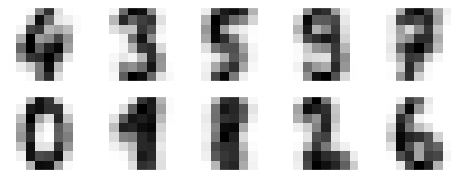

In [76]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

* 看來這 10 個群組的中心，都還有模有樣的，但 1 和 8 似乎分不太清楚

* 因為我們其實有答案，所以可以來對個答案看看. 
* 但因為我們現在只知道每張照片被分到某一群，但我不知道這一群是 0~9 的哪個數字，所以我打算用以下方式來給 label:  
  * 對於 第 i 群 的圖片來說，我取出這些圖片的答案 labels. ，再對這些 labels 取眾數，就用眾數來代表這一群. 
  * 舉例來說，左上圖這一群裡面，假設有 1000 張圖片，那如果這 1000 張圖片的眾樹是 4 ，我就把這一群命名為 4
* 結果如下：

In [77]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [84]:
print("各張照片被分到第幾群： ", clusters)
print("該群代表的數字 label: ", labels)

各張照片被分到第幾群：  [5 7 7 ... 7 3 3]
該群代表的數字 label:  [0 8 8 ... 8 9 9]


* 那，接下來就可以對答案了。先看一下準確率：

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

* 並不意外～ 因為從 centers 來看，除了 1 和 8 這兩個數字外，其他看起來都很明顯，所以有 80% 的資料分的很好. 
* 用 confusion matrix 來確認一下：

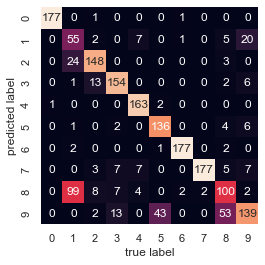

In [79]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

* 1 和 8 最常分錯(不意外)  
* 9 和 5 看來也分的不好  
* 9 和 8 也分的不好

* 我們如果降到 2 維來看原始資料，也可發現這三個數字 overlap 較嚴重. 

* 如果想提升 KMeans 的表現，下一步就是做 kernel KMeans。
* 但我們這邊不想這麼做，我們想試試另一種做法(純屬好玩). 
* 先把資料做 t-SNE，看看做完後是不是資料散得很開，用 KMeans 就能分出來：

In [85]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

/Volumes/GoogleDrive/我的雲端硬碟/0. codepool_python/python_ds/python_ds_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [87]:
digits_proj.shape

(1797, 2)

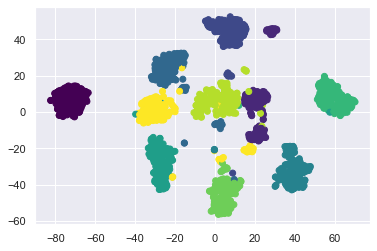

In [89]:
plt.scatter(
    digits_proj[:, 0], 
    digits_proj[:, 1], 
    c=digits.target,
    cmap='viridis'
);

* 看起來各個數字分的很開，而且用圓形就可以一圈一圈的分出來. 
* 那就來看看用 KMeans 可以做多好吧：

In [90]:
# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9432387312186978

* 發現 accuracy 可以到 94%  
* 在我不知道 label 的情況下，還可以有這種準確率，讚啦！！
* 但要提醒的是，在實務上，不太能這樣做，因為
  * t-SNE 只能對手上這筆樣本作轉換，未來新資料進來時，我沒辦法把該圖的 64 維，投影到現在看到的 2 維  
  * 所以只能對手邊這組影像做分群，無法對未來的影像做分群

### [影像分群] Olivetti 臉譜分群

In [142]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/hanklee/scikit_learn_data


### [影像半監督學習] Number Digits

### [影像分割] 